In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <u> Identifying data points , features and class </u> 

In [2]:
haberman=pd.read_csv("Datasets/haberman.csv")

In [3]:
print(haberman)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


In [4]:
print("Dataset Shape = ", haberman.shape)
print("Columns name = ", haberman.columns)
print("Unique Datapoints in Classes \n", haberman['status'].value_counts())

Dataset Shape =  (306, 4)
Columns name =  Index(['age', 'year', 'nodes', 'status'], dtype='object')
Unique Datapoints in Classes 
 1    225
2     81
Name: status, dtype: int64


#### Conclusion:

1. There are 306 Datapoints in this dataset with 4 columns.

2. This dataset has 3 features,
    1. Age of patient at the time of operation.
    2. Patient's year of operation.
    3. Number of positive axillary nodes detected.
    
3. The 4th column status is the class which has entries as either 1 or 2, where:
    1. Class 1 in status is Patient survived 5 years or longer.
    2. Class 2 in status is Patient died within 5 years.
    
4. For class 1 there are 225 entries. For class 2 there are 81 entries.
5. The dataset is an imbalanced one.

## <u> Probability density function(PDF) </u>

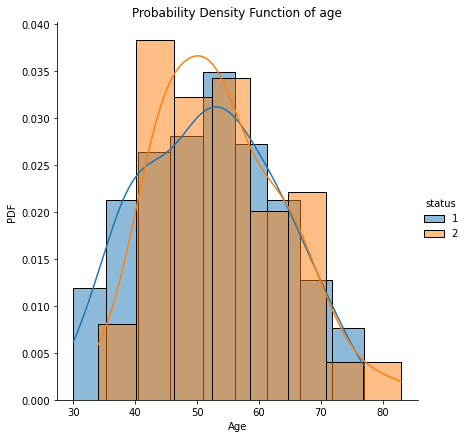

In [5]:
#HISTOGRAM of AGE

g=sns.FacetGrid(haberman, hue='status' , height=6)
g.map(sns.histplot, "age", kde= True, stat= "density" )
g.add_legend()

plt.title('Probability Density Function of age')
plt.xlabel('Age')
plt.ylabel('PDF')
plt.show()

#### Conclusion
1. Age variable is not giving clear picture for categorization of data.
2. Patients with class 1 i.e who survived > 5 years
    1. Are mostly 50-55 age
3. patinets with Class 2 i.e who survived <5 years
    1. Are mostly 40-45 Age

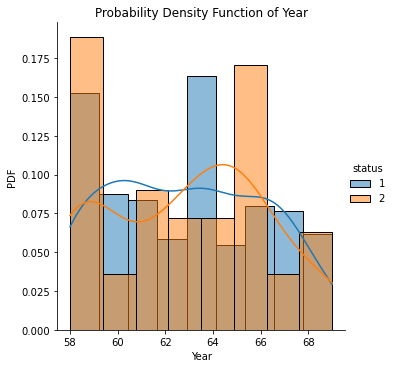

In [6]:
#HISTOGRAM of YEAR


g=sns.FacetGrid(haberman, hue='status' , height=5,)
g.map(sns.histplot, "year", kde= True, stat= "density")

g.add_legend()

plt.title('Probability Density Function of Year')
plt.xlabel('Year')
plt.ylabel('PDF')
plt.show()

#### Conclusion
1. year has no direct relation with status of patient

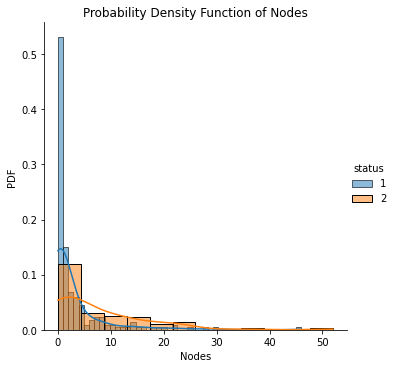

In [7]:
# Histogram with NODES
g=sns.FacetGrid(haberman, hue="status" , height= 5)
g.map(sns.histplot , "nodes" , stat='density', kde=True )
g.add_legend()

plt.title('Probability Density Function of Nodes')
plt.xlabel('Nodes')
plt.ylabel('PDF')
plt.show()

#### Conclusion
1. f the node has values >30 onwards then its highly probable that patient died

## <u> Cumulative distribution Function (CDF)</u>

In [8]:
hb_survived = haberman.loc[haberman["status"]==1]
hb_died = haberman.loc[haberman["status"]==2]

In [9]:
hb_survived.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [10]:
hb_died.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


#### Conclusions
Significantly important and Different values are - 
1. mean nodes - 
    * survived - 2.79
    * died - 7.45
2. St.D nodes -
    * survived - 5.87
    * died - 9.18
3. IQR nodes
    * Survived - 0:3
    * died - 1:11

In [11]:
'''CDF of Class 1 vs 2 - nodes (survived vs not survived)'''
#TO check individually on both class people we will use CDF so that we can get some percentages

'CDF of Class 1 vs 2 - nodes (survived vs not survived)'

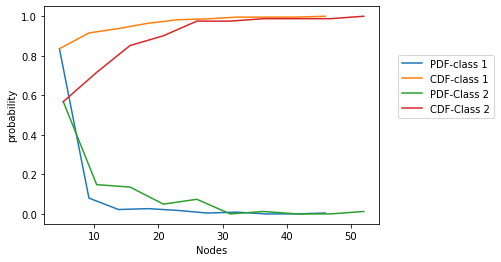

In [12]:
'''FOR CLASS 1 (NODES)'''
counts, bin_edges= np.histogram(hb_survived["nodes"],bins=10,density=True)
pdf= counts/sum(counts)
#print("pdf of nodes for Class 1 = ",pdf)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF-class 1')
plt.plot(bin_edges[1:], cdf, label='CDF-class 1')

#<------------------------------------------------->#

'''FOR CLASS 2 (NODES)'''
counts , bin_edges = np.histogram(hb_died["nodes"],bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF-Class 2")
plt.plot(bin_edges[1:], cdf, label ="CDF-Class 2")

plt.legend(loc='upper center',bbox_to_anchor = (1.2,0.8))
plt.xlabel('Nodes')
plt.ylabel("probability")
plt.show()

#### Observation
* patients having < 23 nodes have little higher probability of surviving
* patients having < 8 nodes have higher probablity of surviving

## <u> Box Plot </u>

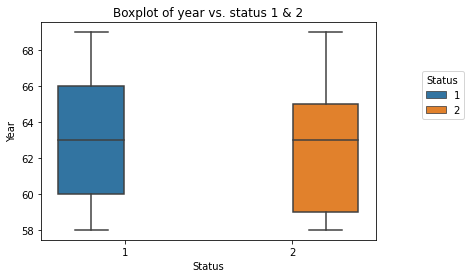

In [13]:
sns.boxplot(x='status', y='year', data=haberman, hue='status')

plt.title('Boxplot of year vs. status 1 & 2')
plt.xlabel('Status')
plt.ylabel('Year')
plt.legend(title='Status', loc='upper center', bbox_to_anchor=(1.2, 0.8))
plt.show()

### Conclusion

1. For status 1, out of 225 patients:
* 25% of patients have got their surgery done in year 1960 or before.
* 50% of patients have got their surgery done in year 1963 or before.
* 75% of patients have got their surgery done in year 1966 or before.
2. For status 2, out of 81 patients:
* 25% of patients have got their surgery done in year 1959 or before.
* 50% of patients have got their surgery done in year 1963 or before.
* 75% of patients have got their surgery done in year 1965 or before.



## <u> 2d Scatter plot </u>

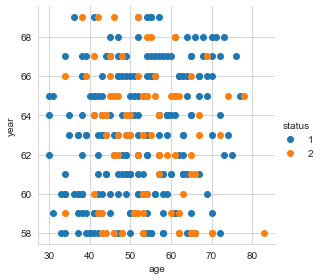

In [14]:
sns.set_style("whitegrid")
g= sns.FacetGrid(haberman, hue="status", height=4)
g.map(plt.scatter, "age", "year")
g.add_legend()

#### Remark
Not able to understand anthing with it

### <u> PAIR PLOT </u>

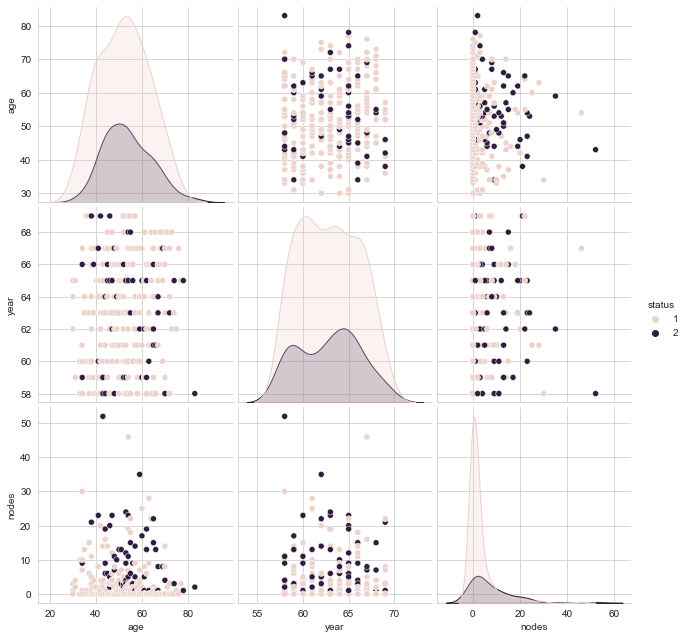

In [15]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue='status' , height=3)
plt.show()

#### Remark
* For age variable is almost non seperable for both classes.
* For year variable is almost non seperable for survied and died cases.
* Nodes have slight difflection in curves, we can use that data more effectively for categorizations.


## <u> Conclusion </u>

1. For the pairplots, the data points are so scattered, that it is difficult to separate them on the plot. So none of the features could be separated by drawing a line on the plot. No feature can help in classifying the datapoints as class 1 or 2.